In [62]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
ride_data = pd.read_csv(ride_data_to_load)
city_data = pd.read_csv(city_data_to_load)

# Combine the data into a single dataset
city_ride_complete = pd.merge(ride_data,city_data, how="left", on=["city"])


# Display the data table for preview
city_ride_complete.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [63]:
city_type = city_data.set_index('city')['type']
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [64]:
urban_city = city_ride_complete.loc[(city_ride_complete["type"] == "Urban")]
urban_city.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [65]:
suburban_city = city_ride_complete.loc[(city_ride_complete["type"] == "Suburban")]
suburban_city.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2018-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2018-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2018-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2018-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2018-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [66]:
rural_city = city_ride_complete.loc[(city_ride_complete["type"] == "Rural")]
rural_city.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


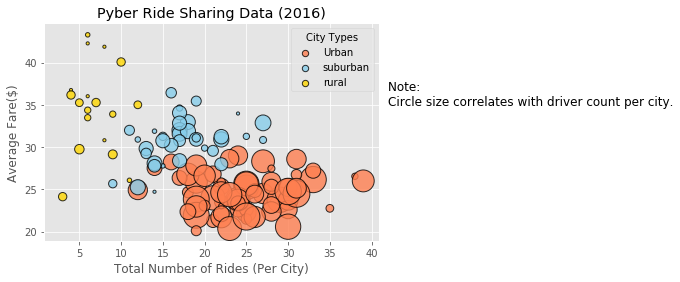

In [77]:
# Obtain the x and y coordinates for each of the three city types

plt.scatter(
    urban_city.groupby(['city']).count()['ride_id'],
    urban_city.groupby(['city']).mean()['fare'],
    s = urban_city.groupby(['city']).mean()['driver_count']*10,
    marker ='o', facecolors ="coral", edgecolors='black',alpha = 0.8,linewidths = 1, label="Urban",
    
)
    

plt.scatter(
    suburban_city.groupby(['city']).count()['ride_id'],
    suburban_city.groupby(['city']).mean()['fare'],
    s = suburban_city.groupby(['city']).mean()['driver_count']*10,
    marker ='o', facecolors ="skyblue", edgecolors='black',alpha = 0.8,linewidths = 1, label="suburban",
    
)
 
    
plt.scatter(
    rural_city.groupby(['city']).count()['ride_id'],
    rural_city.groupby(['city']).mean()['fare'],
    s = rural_city.groupby(['city']).mean()['driver_count']*10,
    marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.8,linewidths = 1, label="rural",
    
)
          
# Incorporate the other graph properties

# Create a legend
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")

plt.grid(True) 

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 12)

# legend 
legend = plt.legend(title = 'City Types',loc='upper right',prop={'size': 10})
legend.legendHandles[0]._sizes = [40]
legend.legendHandles[1]._sizes = [40]
legend.legendHandles[2]._sizes = [40]

# Save the Figure
plt.savefig("Pyber Ride Sharing Data (2016).png", dpi=600)

plt.show()

## Total Fares by City Type

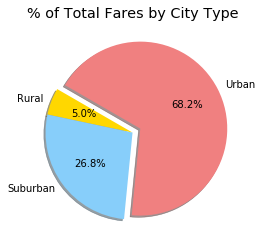

In [78]:
# Calculate Type Percents
fare_sum = city_ride_complete.groupby(['type'])['ride_id'].sum()

# Build Pie Chart
labels = "Rural","Suburban","Urban"
sizes = fare_sum
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)  

plt.pie(sizes, explode, labels, colors, autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Fares by City Type")


# Save Figure
plt.savefig("% of Total Fares by City Type.png", dpi=600)

plt.show() 

## Total Rides by City Type

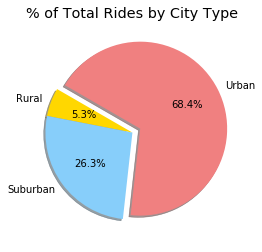

In [70]:
# Calculate Ride Percents
ride_average = city_ride_complete.groupby(['type'])['ride_id'].count()



# Build Pie Chart

labels = "Rural","Suburban","Urban"
sizes = ride_average
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)  

plt.pie(sizes, explode, labels, colors, autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Rides by City Type")


# Save Figure
plt.savefig("% of Total Rides by City Type.png", dpi=600)

plt.show() 


## Total Drivers by City Type

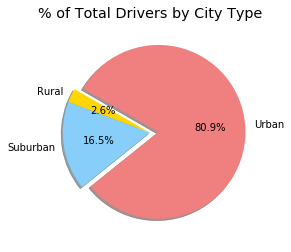

In [72]:
# Calculate Driver Percents
driver_sum = city_data.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = "Rural","Suburban","Urban"
sizes = driver_sum
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)  

plt.pie(sizes, explode, labels, colors, autopct='%1.1f%%', shadow=True, startangle=150)

plt.title("% of Total Drivers by City Type")


# Save Figure
plt.savefig("% of Total Rides by City Type.png", dpi=600)

plt.show() 



